In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from onnx_infer import BrainUnetInference

In [5]:
brain = BrainUnetInference("brain_unet.onnx")

def make_prediction(image_path, r=255, g=255, b=0):
  original_img = cv2.imread(image_path)
  original_img = cv2.resize(original_img, (256,256))

  pred = brain.predict(image_path)
  pred_rgb = cv2.merge([
      pred*r, pred*g, pred*b
  ])
  show = np.concatenate([original_img, pred_rgb], axis=0)
  return show

In [3]:
image_list = os.listdir("test_images")
image_list = [os.path.join("test_images", i) for i in image_list]

/content/onnx_infer.py:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


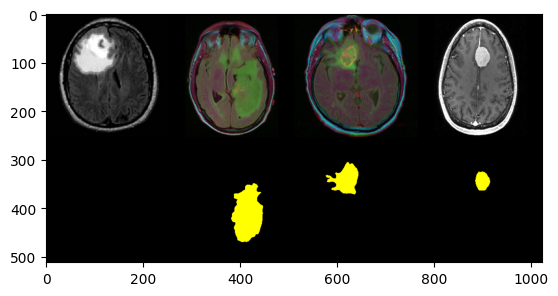

In [6]:
results = []
for img in image_list:
  pred = make_prediction(img)
  results.append(pred)

results = np.concatenate(results, axis=1)
plt.imshow(results)
plt.show()